# Part 1

In [60]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from plotnine import *

In [61]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

In [62]:
insurance.head

<bound method NDFrame.head of      age     sex     bmi smoker     region      charges
0     19  female  27.900    yes  southwest  16884.92400
1     33    male  22.705     no  northwest  21984.47061
2     32    male  28.880     no  northwest   3866.85520
3     31  female  25.740     no  southeast   3756.62160
4     60  female  25.840     no  northwest  28923.13692
..   ...     ...     ...    ...        ...          ...
426   23  female  33.400     no  southwest  10795.93733
427   18  female  31.920     no  northeast   2205.98080
428   18  female  36.850     no  southeast   1629.83350
429   21  female  25.800     no  southwest   2007.94500
430   61  female  29.070    yes  northwest  29141.36030

[431 rows x 6 columns]>

In [63]:
insurance.describe

<bound method NDFrame.describe of      age     sex     bmi smoker     region      charges
0     19  female  27.900    yes  southwest  16884.92400
1     33    male  22.705     no  northwest  21984.47061
2     32    male  28.880     no  northwest   3866.85520
3     31  female  25.740     no  southeast   3756.62160
4     60  female  25.840     no  northwest  28923.13692
..   ...     ...     ...    ...        ...          ...
426   23  female  33.400     no  southwest  10795.93733
427   18  female  31.920     no  northeast   2205.98080
428   18  female  36.850     no  southeast   1629.83350
429   21  female  25.800     no  southwest   2007.94500
430   61  female  29.070    yes  northwest  29141.36030

[431 rows x 6 columns]>

In [64]:
insurance = pd.get_dummies(insurance, columns= ["smoker", "sex"], drop_first = True)
insurance = insurance.dropna()
insurance.head()

,age,bmi,region,charges,smoker_yes,sex_male
0,19,27.900,southwest,16884.92400,True,False
1,33,22.705,northwest,21984.47061,False,True
2,32,28.880,northwest,3866.85520,False,True
3,31,25.740,southeast,3756.62160,False,False
4,60,25.840,northwest,28923.13692,False,False


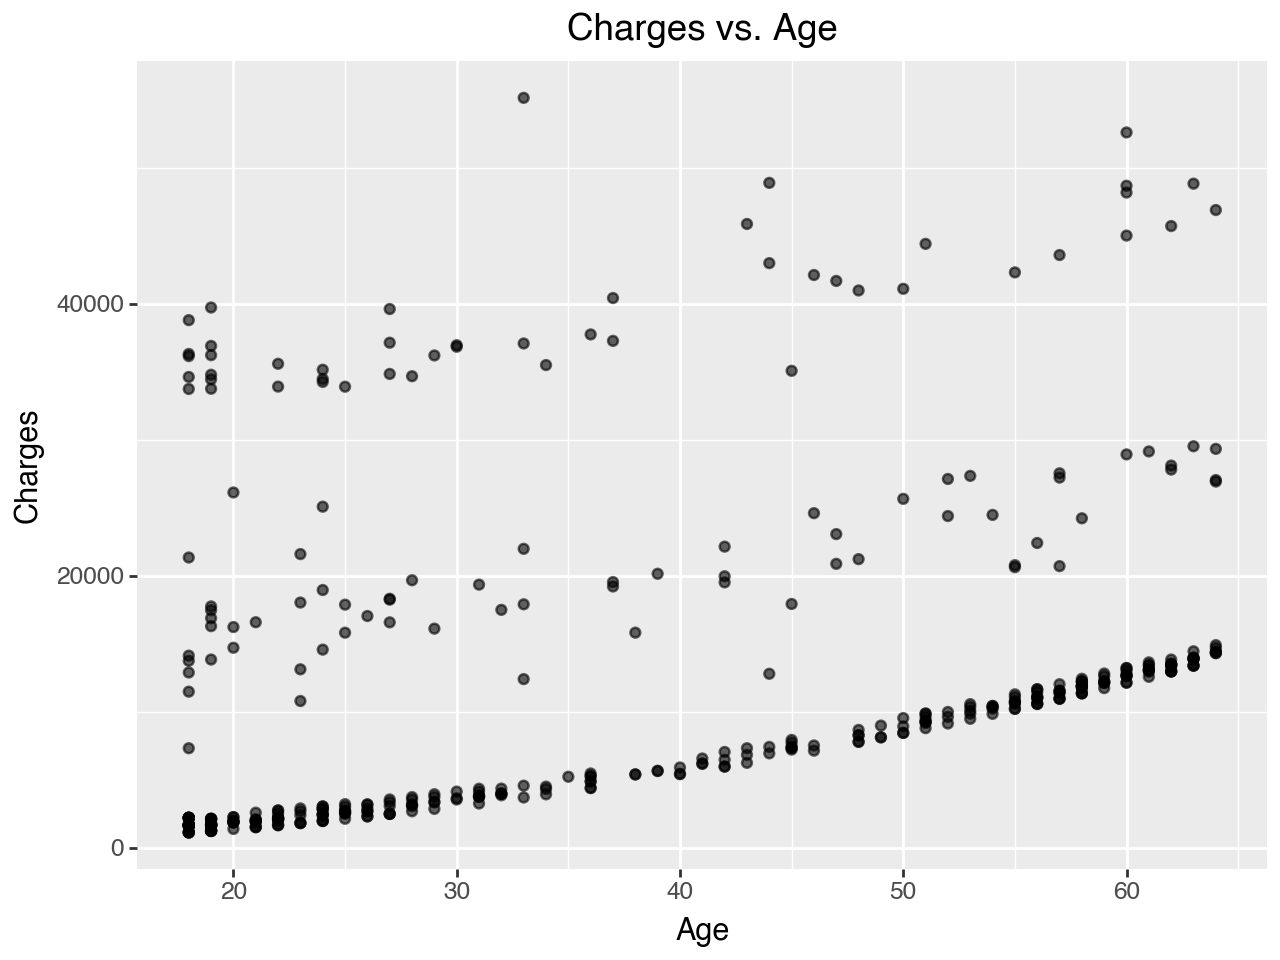

In [65]:
# Visualization 1: Chargers Vs Age
(ggplot(insurance, aes(x='age', y='charges')) +
 geom_point(alpha=0.6) +
 ggtitle("Charges vs. Age") +
 labs(x="Age", y="Charges") +
 theme_gray())


It seems that there is a positive relationship with charges and age. As age increases it appears that medical charges do as well. Additionally, it seems there is high variability with charges which makes sense given the medical industry, most patients expereince relatively low stable costs while some experience extremely high costs. 

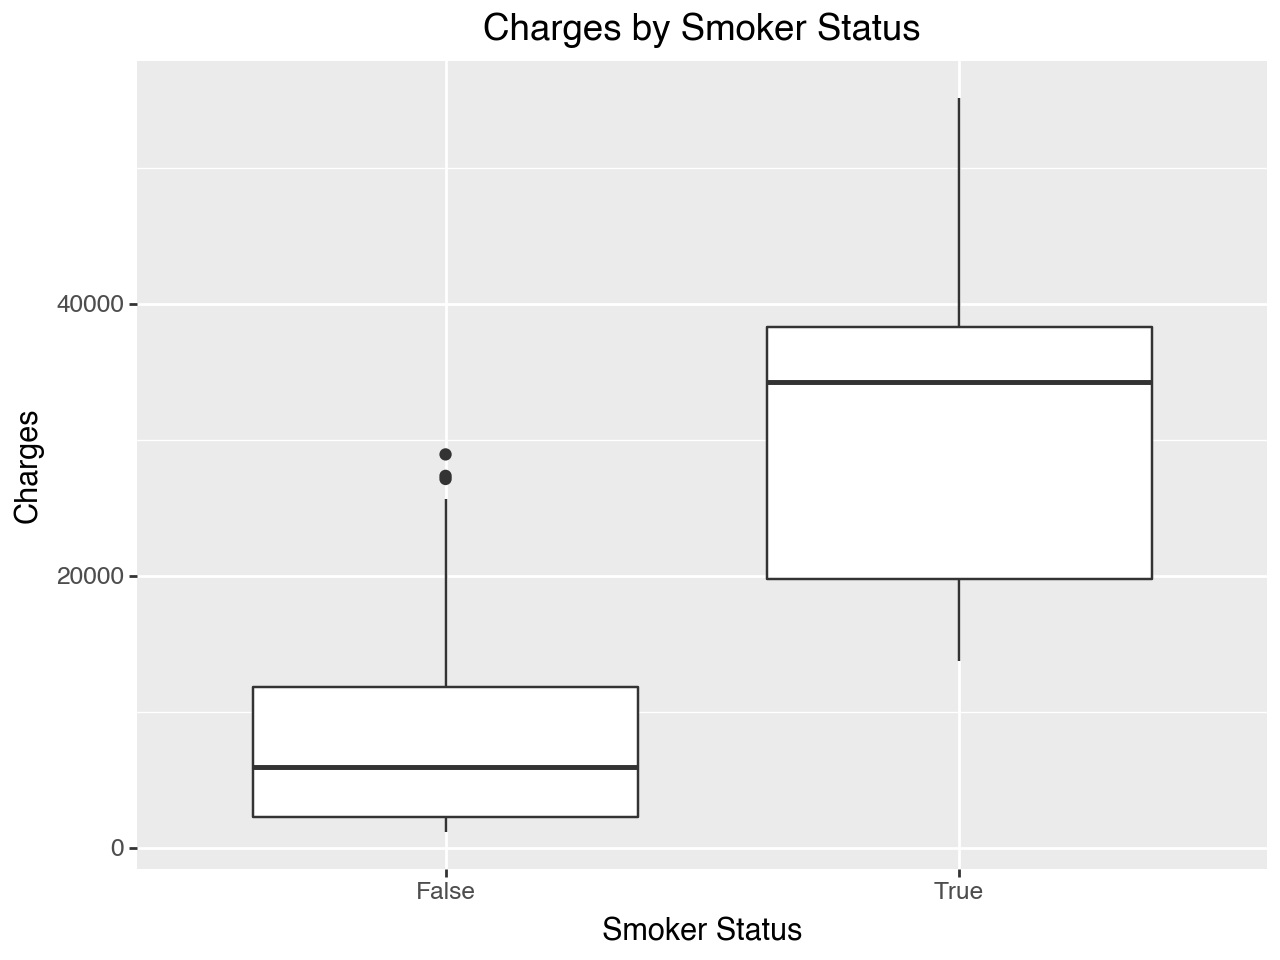

In [66]:
# Visualization 2: Chargers vs Smoker (yes or no)
(ggplot(insurance, aes(x='smoker_yes', y='charges')) +
 geom_boxplot() +
 ggtitle("Charges by Smoker Status") +
 labs(x="Smoker Status", y="Charges") +
 theme_gray())

This boxplot shows that smokers have higher medical charges than non smokers which makes sense considering the health risks associated with smoking. 

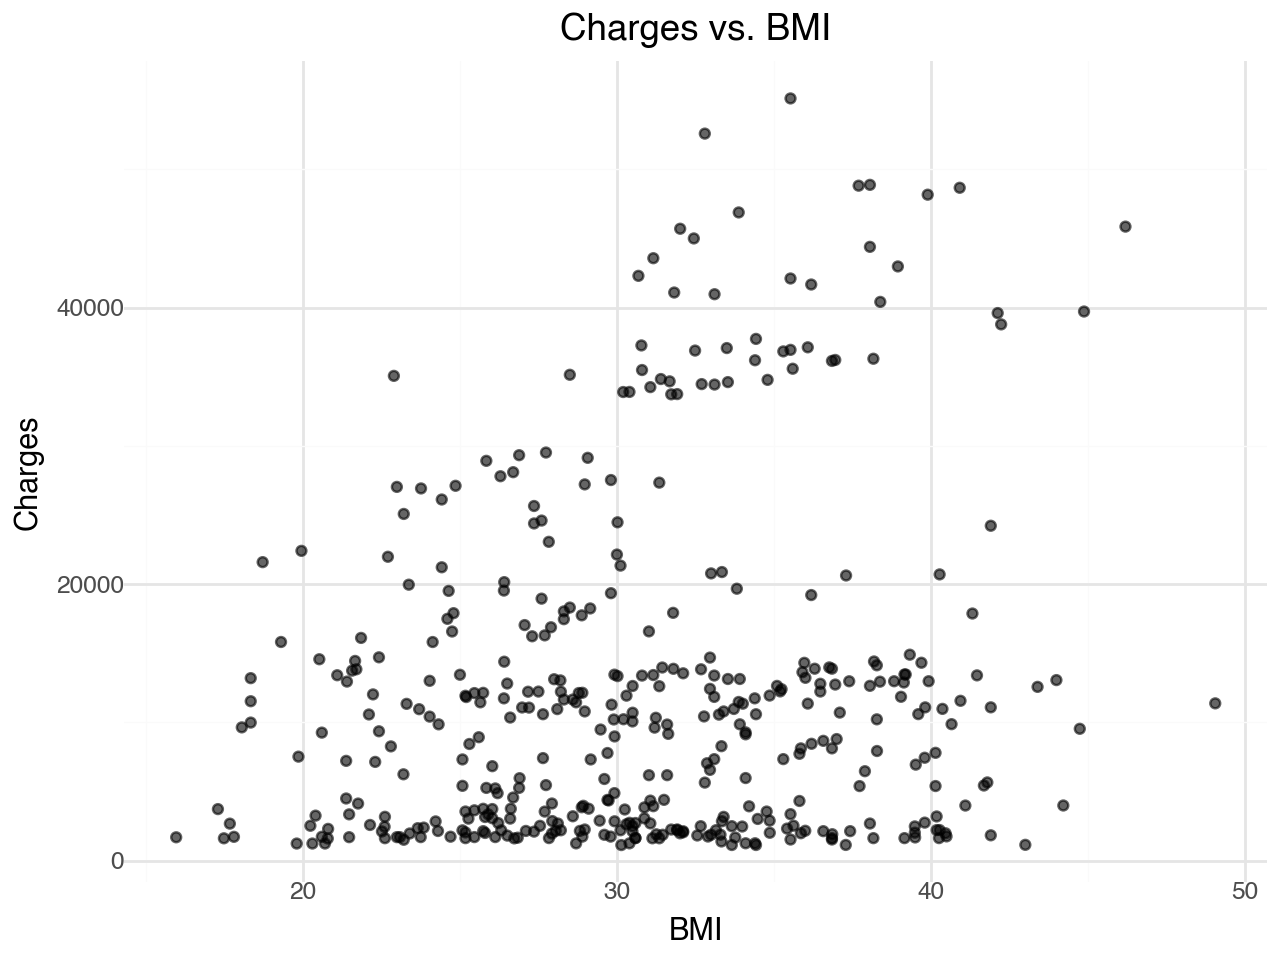

In [67]:
# Visualization 3: Chargers VS BMI
(ggplot(insurance, aes(x='bmi', y='charges')) +
 geom_point(alpha=0.6) +
 ggtitle("Charges vs. BMI") +
 labs(x="BMI", y="Charges") +
 theme_minimal())

This visualization supports common sense similarly to the first two visualization. As BMI increases, the charges also increase in this scatter plot. Additionally, there is still pretty high variability.

# Part 2

## Model 1

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [69]:
# response variable
y = insurance['charges']

# set seed
seed = 1

# predictor
X_age = insurance[['age']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=seed)

# column transformer for age and smoker
ct_age = ColumnTransformer(
    transformers=[
        ("scale_age", StandardScaler(), ["age"])
    ],
    remainder="drop"
)

# pipeline
pipeline_age = Pipeline([
    ("preprocessing", ct_age),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age.fit(X_train, y_train)
train_pred_age = pipeline_age.predict(X_train)
test_pred_age = pipeline_age.predict(X_test)

# metrics
mse_test_age = mean_squared_error(y_test, test_pred_age)
r2_test_age = r2_score(y_test, test_pred_age)

# coefficients
intercept_age = pipeline_age.named_steps["linear_regression"].intercept_
coefficient_age = pipeline_age.named_steps["linear_regression"].coef_

# results
print("Model 1: Charges ~ Age")
print("Test MSE:", mse_test_age)
print("Test R^2:", r2_test_age)
print("Intercept:", intercept_age)
print("Coefficient for Age:", coefficient_age)



Model 1: Charges ~ Age
Test MSE: 87360446.31994985
Test R^2: 0.1164624811074515
Intercept: 12507.882882206395
Coefficient for Age: [3781.31519875]
Model 1: Charges ~ Age
Test MSE: 87360446.31994985
Test R^2: 0.1164624811074515
Intercept: 12507.882882206395
Coefficient for Age: [3781.31519875]


Analysis of Model 1: It appears that there is a relationship with age and charges with older individuals having higher chargers. The low r squared indicates that age alone doesn't contain all the variables that influence charges. It seems the model lacks thouroughness. 

## Model 2

In [70]:
# model 2
X_age_sex = insurance[['age', 'sex_male']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_age_sex, y, test_size=0.2, random_state=seed)

# column transformer for age and smoker
ct_age_sex = ColumnTransformer(
    transformers=[
        ("scale_age", StandardScaler(), ["age"]),
        ("encode_sex", OneHotEncoder(drop="first"), ["sex_male"])
    ],
    remainder="drop"
)

# pipeline
pipeline_age_sex = Pipeline([
    ("preprocessing", ct_age_sex),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age_sex.fit(X_train, y_train)
train_pred_age_sex = pipeline_age_sex.predict(X_train)
test_pred_age_sex = pipeline_age_sex.predict(X_test)

# metrics
mse_test_age_sex = mean_squared_error(y_test, test_pred_age_sex)
r2_test_age_sex = r2_score(y_test, test_pred_age_sex)

# coefficients
intercept_age_sex = pipeline_age_sex.named_steps["linear_regression"].intercept_
coefficients_age_sex = pipeline_age_sex.named_steps["linear_regression"].coef_

# results
print("\nModel 2: Charges ~ Age + Sex")
print("Test MSE:", mse_test_age_sex)
print("Test R^2:", r2_test_age_sex)
print("Intercept:", intercept_age_sex)
print("Coefficients (Age, Sex):", coefficients_age_sex)



Model 2: Charges ~ Age + Sex
Test MSE: 87817757.4281558
Test R^2: 0.11183737284705553
Intercept: 12064.173523995005
Coefficients (Age, Sex): [3778.73212767  936.41729586]


Model 2: Charges ~ Age + Sex
Test MSE: 87817757.4281558
Test R^2: 0.11183737284705553
Intercept: 12064.173523995005
Coefficients (Age, Sex): [3778.73212767  936.41729586]


## Model 3

In [71]:
# model 3
X_age_smoker = insurance[['age', 'smoker_yes']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_age_smoker, y, test_size=0.2, random_state=seed)

# column transformer for age and smoker
ct_age_smoker = ColumnTransformer(
    transformers=[
        ("scale_age", StandardScaler(), ["age"]),
        ("encode_smoker", OneHotEncoder(drop="first"), ["smoker_yes"])
    ],
    remainder="drop"
)

#pipeline
pipeline_age_smoker = Pipeline([
    ("preprocessing", ct_age_smoker),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age_smoker.fit(X_train, y_train)
train_pred_age_smoker = pipeline_age_smoker.predict(X_train)
test_pred_age_smoker = pipeline_age_smoker.predict(X_test)

# metrics
mse_test_age_smoker = mean_squared_error(y_test, test_pred_age_smoker)
r2_test_age_smoker = r2_score(y_test, test_pred_age_smoker)

# coefficients
intercept_age_smoker = pipeline_age_smoker.named_steps["linear_regression"].intercept_
coefficients_age_smoker = pipeline_age_smoker.named_steps["linear_regression"].coef_

# results
print("\nModel 3: Charges ~ Age + Smoker")
print("Test MSE:", mse_test_age_smoker)
print("Test R^2:", r2_test_age_smoker)
print("Intercept:", intercept_age_smoker)
print("Coefficients (Age, Smoker):", coefficients_age_smoker)



Model 3: Charges ~ Age + Smoker
Test MSE: 33276382.05074153
Test R^2: 0.6634525889765442
Intercept: 7385.917361827223
Coefficients (Age, Smoker): [ 4038.92506917 25170.80198586]


Model 3: Charges ~ Age + Smoker
Test MSE: 33276382.05074153
Test R^2: 0.6634525889765442
Intercept: 7385.917361827223
Coefficients (Age, Smoker): [ 4038.92506917 25170.80198586]


## Q4

Based on the values calculated above, model 3 performs better than model 2 due to the lower MSE and higher r squared. The R squared is higher due to the inclusion of smoker, which is a strong predictor of charges, and also typically adding a variable to the model increases the R squared. The lower MSE in model 3 suggests that smoking has more of an impact on charges than sex does. 

# Part 3

## 1

In [72]:

# predictors
X = insurance[['age', 'bmi']]

# split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# column transformer for age and bmi
ct_age_bmi = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
)

# pipeline
pipeline_age_bmi = Pipeline([
    ("preprocessing", ct_age_bmi),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age_bmi.fit(X_train, y_train)
train_pred_age_bmi = pipeline_age_bmi.predict(X_train)
test_pred_age_bmi = pipeline_age_bmi.predict(X_test)

# metrics
mse_test_age_bmi = mean_squared_error(y_test, test_pred_age_bmi)
r2_test_age_bmi = r2_score(y_test, test_pred_age_bmi)

# coefficients
intercept_age_bmi = pipeline_age_bmi.named_steps['linear_regression'].intercept_
coefficients_age_bmi = pipeline_age_bmi.named_steps['linear_regression'].coef_

# results
print("Model: Charges ~ Age + BMI")
print("Intercept:", intercept_age_bmi)
print("Coefficients (Age, BMI):", coefficients_age_bmi)
print("Test MSE:", mse_test_age_bmi)
print("Test R^2:", r2_test_age_bmi)


Model: Charges ~ Age + BMI
Intercept: 12507.882882206395
Coefficients (Age, BMI): [3485.11290678 1697.05414756]
Test MSE: 83569014.93472663
Test R^2: 0.1548078882140368
Model: Charges ~ Age + BMI
Intercept: 12507.882882206395
Coefficients (Age, BMI): [3485.11290678 1697.05414756]
Test MSE: 83569014.93472663
Test R^2: 0.1548078882140368


Analysis: The MSE shows the average error for predictions in the model with age and bmi as predictors. This is an improvement from the model using only age as a predictor. This promotes the idea that adding bmi to the model actually benefits prediction ability. Although it is still a relatively low R squared, this model is better than the model with just age as the predictor. 

## 2

In [73]:
# Define predictors for Model Age + Age^2
X_age_squared = insurance[['age']]

# polynomial for age and age squared
poly_transformer_2 = PolynomialFeatures(degree=2, include_bias=False)

# column transformer for age and age squared
ct_age_squared = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), [0, 1]) 
    ],
    remainder="drop"
)

# pipeline
pipeline_age_squared = Pipeline([
    ("poly_features", poly_transformer_2),  
    ("preprocessing", ct_age_squared),
    ("linear_regression", LinearRegression())
])

# Split data into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_age_squared, y, test_size=0.2, random_state=seed)

# Fit the pipeline and make predictions for both training and test sets
pipeline_age_squared.fit(X_train, y_train)
train_pred_age_squared = pipeline_age_squared.predict(X_train)
test_pred_age_squared = pipeline_age_squared.predict(X_test)

# Calculate RMSE and R-squared for the test set
mse_test_age_squared = mean_squared_error(y_test, test_pred_age_squared)
r2_test_age_squared = r2_score(y_test, test_pred_age_squared)

# Extract coefficients
intercept_age_squared = pipeline_age_squared.named_steps['linear_regression'].intercept_
coefficients_age_squared = pipeline_age_squared.named_steps['linear_regression'].coef_

# results
print("Model: Charges ~ Age + Age^2")
print("Intercept:", intercept_age_squared)
print("Coefficients (Age, Age^2):", coefficients_age_squared)
print("Test MSE:", mse_test_age_squared)
print("Test R^2:", r2_test_age_squared)

Model: Charges ~ Age + Age^2
Intercept: 12507.882882206395
Coefficients (Age, Age^2): [3572.37039918  210.73818974]
Test MSE: 87413315.30554141
Test R^2: 0.11592777994321002
Model: Charges ~ Age + Age^2
Intercept: 12507.882882206395
Coefficients (Age, Age^2): [3572.37039918  210.73818974]
Test MSE: 87413315.30554141
Test R^2: 0.11592777994321002


Adding the age squared term did very little to change the MSE or R squared. It is marginally worse in terms of MSE and marginally better for R squared.

## 3

In [74]:
# predictors
X_age = insurance[['age']]

# split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=seed)

# column transform degree 4
ct_poly_4 = ColumnTransformer(
    transformers=[
        ("degree", PolynomialFeatures(degree=4), ["age"])
    ],
    remainder="drop"
)

# pipeline
pipeline_poly_4 = Pipeline([
    ("preprocessing", ct_poly_4),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_poly_4.fit(X_train, y_train)
train_pred_poly_4 = pipeline_poly_4.predict(X_train)
test_pred_poly_4 = pipeline_poly_4.predict(X_test)

# metrics
mse_test_poly_4 = mean_squared_error(y_test, test_pred_poly_4)
r2_test_poly_4 = r2_score(y_test, test_pred_poly_4)

# coefficients
intercept_poly_4 = pipeline_poly_4.named_steps['linear_regression'].intercept_
coefficients_poly_4 = pipeline_poly_4.named_steps['linear_regression'].coef_

# results
print("Model: Charges ~ Polynomial(Age, Degree 4)")
print("Intercept:", intercept_poly_4)
print("Coefficients (Age, Age^2, Age^3, Age^4):", coefficients_poly_4)
print("Test MSE:", mse_test_poly_4)
print("Test R^2:", r2_test_poly_4)


Model: Charges ~ Polynomial(Age, Degree 4)
Intercept: 72752.56295426608
Coefficients (Age, Age^2, Age^3, Age^4): [ 0.00000000e+00 -8.18722967e+03  3.59319954e+02 -6.37922325e+00  4.01176274e-02]
Test MSE: 85868140.4027371
Test R^2: 0.13155521841666706
Model: Charges ~ Polynomial(Age, Degree 4)
Intercept: 72752.56295426608
Coefficients (Age, Age^2, Age^3, Age^4): [ 0.00000000e+00 -8.18722967e+03  3.59319954e+02 -6.37922325e+00  4.01176274e-02]
Test MSE: 85868140.4027371
Test R^2: 0.13155521841666706


The MSE and R squared value here are both better than those in P2 Q1. P2 Q1 MSE is 87360446 with an R squared of 0.116. This model is better with an MSE of 85868140 and R squared of 0.136

## 4

In [75]:
# predictors
X_age = insurance[['age']]

# split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=seed)

# degree 12
ct_poly_12 = ColumnTransformer(
    transformers=[
        ("degree", PolynomialFeatures(degree=12), ["age"])
    ],
    remainder="drop"
)

# pipeline
pipeline_poly_12 = Pipeline([
    ("preprocessing", ct_poly_12),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_poly_12.fit(X_train, y_train)
train_pred_poly_12 = pipeline_poly_12.predict(X_train)
test_pred_poly_12 = pipeline_poly_12.predict(X_test)

# metrics
mse_test_poly_12 = mean_squared_error(y_test, test_pred_poly_12)
r2_test_poly_12 = r2_score(y_test, test_pred_poly_12)

# coefficients
intercept_poly_12 = pipeline_poly_12.named_steps['linear_regression'].intercept_
coefficients_poly_12 = pipeline_poly_12.named_steps['linear_regression'].coef_

# results
print("Model: Charges ~ Polynomial(Age, Degree 12)")
print("Intercept:", intercept_poly_12)
print("Coefficients (up to Age^12):", coefficients_poly_12)
print("Test MSE:", mse_test_poly_12)
print("Test R^2:", r2_test_poly_12)


Model: Charges ~ Polynomial(Age, Degree 12)
Intercept: 5766.909278374751
Coefficients (up to Age^12): [ 0.00000000e+00  1.31830716e-05  2.01202937e-08  5.01140986e-07  8.28588130e-06  9.87449966e-05  6.58700952e-04 -7.38589013e-05
  3.38209202e-06 -8.05691881e-08  1.04608579e-09 -6.96103760e-12  1.83144414e-14]
Test MSE: 90976491.28003879
Test R^2: 0.07989088003595735
Model: Charges ~ Polynomial(Age, Degree 12)
Intercept: 5766.909278374751
Coefficients (up to Age^12): [ 0.00000000e+00  1.31830716e-05  2.01202937e-08  5.01140986e-07  8.28588130e-06  9.87449966e-05  6.58700952e-04 -7.38589013e-05
  3.38209202e-06 -8.05691881e-08  1.04608579e-09 -6.96103760e-12  1.83144414e-14]
Test MSE: 90976491.28003879
Test R^2: 0.07989088003595735


The MSE and R squared metrics here are worse than the model in Part 2 Q1. 

## 5

Based on the analysis of MSE and R squared from the above models (compared to P2Q1) I would select the model created in part 3. This model used the polynomial 4 and had the lowest MSE with the highest R squared.

## 6

In [ ]:
# Make predictions for all data points using the degree 12 model
insurance['poly_degree_12_pred'] = pipeline_poly_12.predict(insurance[['age']])

# Create the plot
(
    ggplot(insurance, aes(x="age", y="charges")) +
    geom_point() +
    geom_line(aes(y="poly_degree_12_pred"), color="red") +
    labs(x="Age", y="Charges", title="Charges by Age with Degree 12 Polynomial Fit") +
    theme_gray()
)


# Part 4: New Data

In [77]:
insurance1 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
insurance1

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


In [78]:
insurance1 = pd.get_dummies(insurance1, columns= ["smoker", "sex"], drop_first = True)
insurance1 = insurance1.dropna()
insurance1.head()

,age,bmi,region,charges,smoker_yes,sex_male
0,23,34.400,southwest,1826.84300,False,True
1,56,40.300,southwest,10602.38500,False,True
2,18,34.100,southeast,1137.01100,False,True
3,63,23.085,northeast,14451.83515,False,False
4,63,28.310,northwest,13770.09790,False,True


In [79]:
y = insurance['charges']

In [106]:
# predictors
X_age = insurance[['age']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=1)

# pipeline
pipeline_age = Pipeline([
    ("preprocessing", StandardScaler()),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age.fit(X_train, y_train)
age_preds_new = pipeline_age.predict(insurance1[['age']])

# metrics
mse_age = mean_squared_error(insurance1['charges'], age_preds_new)
print("MSE for age-only model:", mse_age)

MSE for age-only model: 136186450.83862
MSE for age-only model: 136186450.83862


In [108]:
# predictors
X_age_bmi = insurance[['age', 'bmi']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_age_bmi, y, test_size=0.2, random_state=1)

# pipeline
pipeline_age_bmi = Pipeline([
    ("preprocessing", StandardScaler()),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age_bmi.fit(X_train, y_train)
age_bmi_preds_new = pipeline_age_bmi.predict(insurance1[['age', 'bmi']])

# metrics
mse_age_bmi = mean_squared_error(insurance1['charges'], age_bmi_preds_new)
print("MSE for age and bmi model:", mse_age_bmi)


MSE for age and bmi model: 132735990.20716709
MSE for age and bmi model: 132735990.20716709


In [86]:
# predictors
X_age_bmi_smoker = insurance[['age', 'bmi', 'smoker_yes']]

# preprocessing
ct = ColumnTransformer([
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("encode", OneHotEncoder(drop='first'), ["smoker_yes"])
])

# pipeline
pipeline_age_bmi_smoker = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_age_bmi_smoker.fit(X_train, y_train)
age_bmi_smoker_preds_new = pipeline_age_bmi_smoker.predict(insurance1[['age', 'bmi', 'smoker_yes']])

# metrics
mse_age_bmi_smoker = mean_squared_error(insurance1['charges'], age_bmi_smoker_preds_new)
print("MSE for age, bmi, and smoker model:", mse_age_bmi_smoker)


MSE for age, bmi, and smoker model: 35790047.170214616
MSE for age, bmi, and smoker model: 35790047.170214616


In [87]:
# pipeline with interaction term
ct_interaction = ColumnTransformer([
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("encode", OneHotEncoder(drop='first'), ["smoker_yes"])
])

pipeline_interaction = Pipeline([
    ("preprocessing", ct_interaction),
    ("polynomial", PolynomialFeatures(interaction_only=True)),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_interaction.fit(X_train, y_train)
interaction_preds_new = pipeline_interaction.predict(insurance1[['age', 'bmi', 'smoker_yes']])

# metrics
mse_interaction = mean_squared_error(insurance1['charges'], interaction_preds_new)
print("MSE for age, bmi with smoker interaction model:", mse_interaction)


MSE for age, bmi with smoker interaction model: 21844434.58816077
MSE for age, bmi with smoker interaction model: 21844434.58816077


In [88]:
# polynomial interaction for full interactions
pipeline_full_interaction = Pipeline([
    ("preprocessing", ct_interaction),
    ("polynomial", PolynomialFeatures(degree=2, interaction_only=False)),
    ("linear_regression", LinearRegression())
])

# fit/predict
pipeline_full_interaction.fit(X_train, y_train)
full_interaction_preds_new = pipeline_full_interaction.predict(insurance1[['age', 'bmi', 'smoker_yes']])

# metrics
mse_full_interaction = mean_squared_error(insurance1['charges'], full_interaction_preds_new)
print("MSE for full interaction model:", mse_full_interaction)


MSE for full interaction model: 21656457.86637088
MSE for full interaction model: 21656457.86637088


This full interaction model has the lowest MSE.

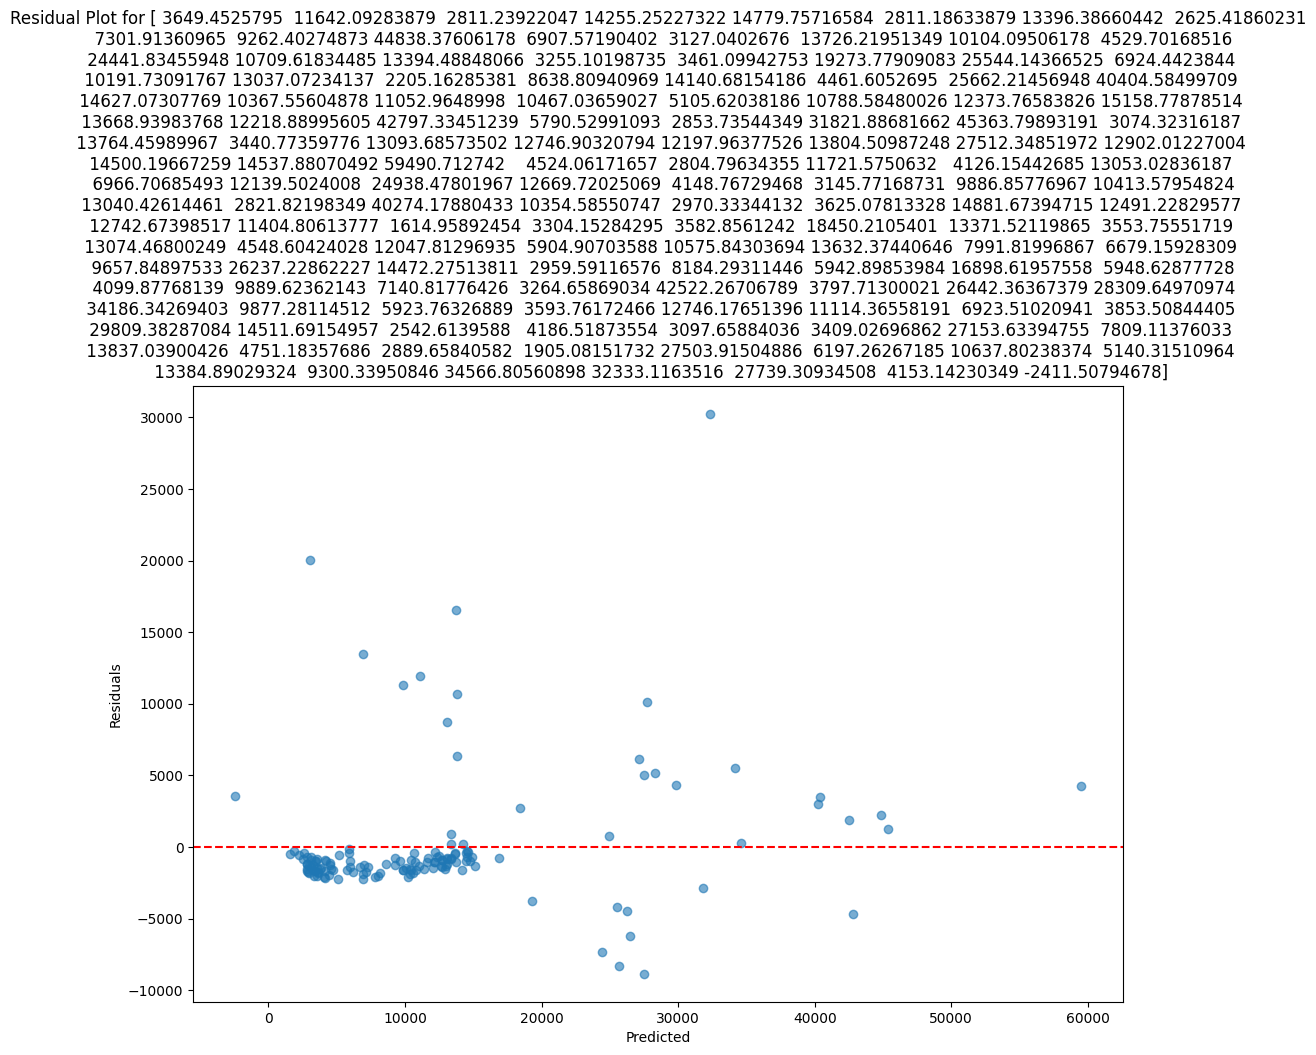

In [105]:

newY = insurance1['charges']
newPred = full_interaction_preds_new

residuals = newY - newPred

plt.figure(figsize=(12, 8))
plt.scatter(newPred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title(f"Residual Plot for {newPred}")
plt.show()


# Part 5: Full Exploration

In [109]:

# response and predictors 
y = insurance['charges']
X = insurance[['age', 'bmi', 'smoker_yes', 'sex_male']]

# empty dict for loop MSEs
model_results = {}

# loop over polynomial degrees to better the model in Part 4
for degree in range(1, 4):

    # pipeline
    ct = ColumnTransformer([
        ("scale_numeric", StandardScaler(), ["age", "bmi"]),
        ("encode_categorical", OneHotEncoder(drop='first'), ["smoker_yes", "sex_male"])
    ], remainder="passthrough")

    pipeline = Pipeline([
        ("preprocessing", ct),
        ("poly_features", PolynomialFeatures(degree=degree, interaction_only=False)),
        ("linear_regression", LinearRegression())
    ])

    # fit
    pipeline.fit(X, y)
    
    # predict
    new_X = insurance1[['age', 'bmi', 'smoker_yes', 'sex_male']]
    predictions = pipeline.predict(new_X)

    # metrics
    mse = mean_squared_error(insurance1['charges'], predictions)
    model_results[f"Degree {degree}"] = mse

    # results
    print(f"Model with polynomial degree {degree} has MSE: {mse}")

# lowest model
best_model_degree = min(model_results, key=model_results.get)
best_mse = model_results[best_model_degree]
print(f"\nBest model is {best_model_degree} with MSE: {best_mse}")


Model with polynomial degree 1 has MSE: 35467887.90561788
Model with polynomial degree 2 has MSE: 21549294.357748143
Model with polynomial degree 3 has MSE: 22065929.065297786

Best model is Degree 2 with MSE: 21549294.357748143
Model with polynomial degree 1 has MSE: 35467887.90561788
Model with polynomial degree 2 has MSE: 21549294.357748143
Model with polynomial degree 3 has MSE: 22065929.065297786

Best model is Degree 2 with MSE: 21549294.357748143


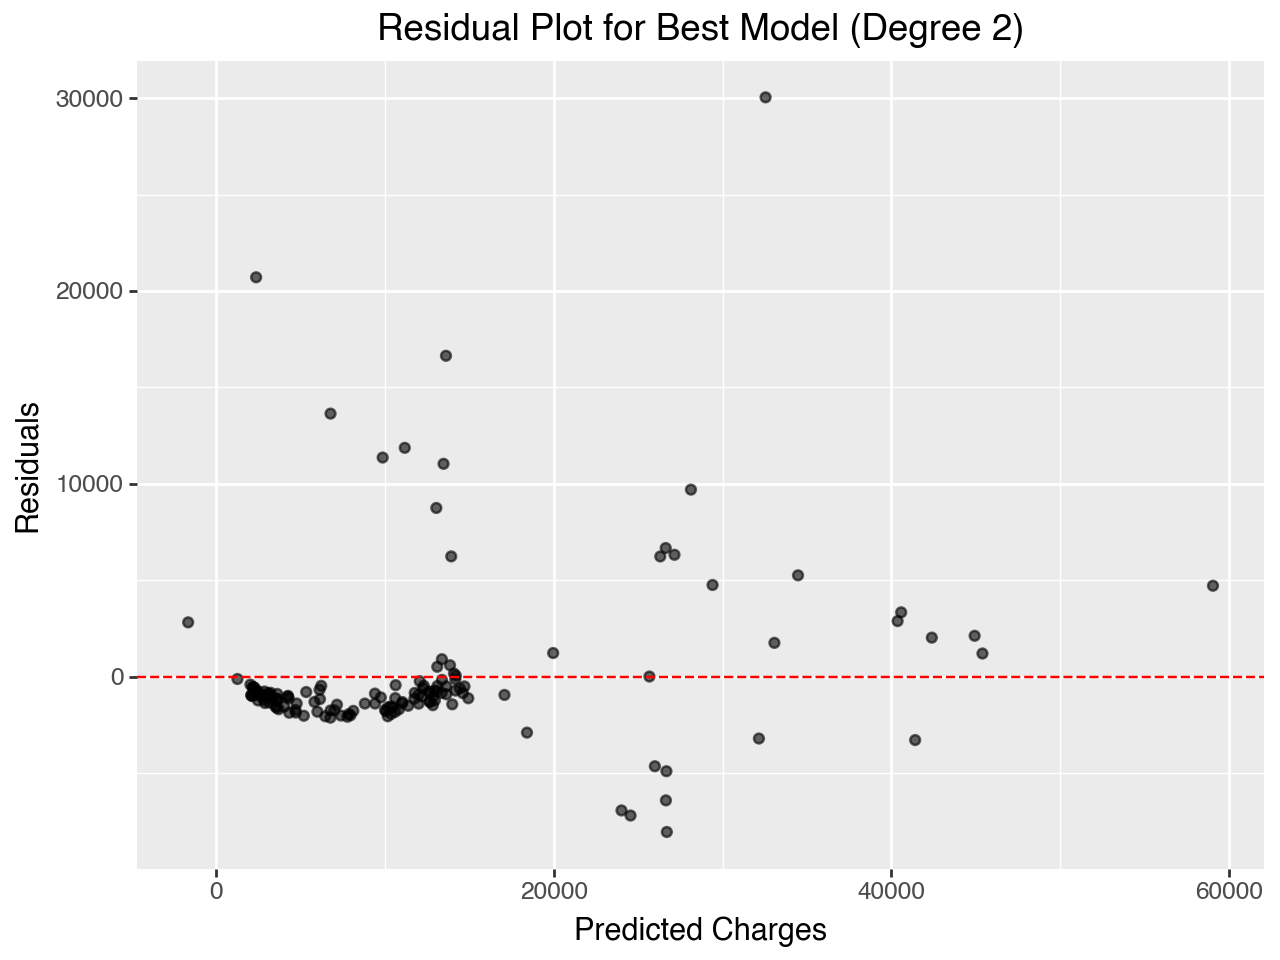

In [110]:
from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme_gray

# best model
best_degree = int(best_model_degree.split()[-1])

# define/fit the final best model
ct_best = ColumnTransformer([
    ("scale_numeric", StandardScaler(), ["age", "bmi"]),
    ("encode_categorical", OneHotEncoder(drop='first'), ["smoker_yes", "sex_male"])
], remainder="passthrough")

pipeline_best = Pipeline([
    ("preprocessing", ct_best),
    ("poly_features", PolynomialFeatures(degree=best_degree, interaction_only=False)),
    ("linear_regression", LinearRegression())
])

pipeline_best.fit(X, y)

# predict
new_X = insurance1[['age', 'bmi', 'smoker_yes', 'sex_male']]
final_predictions = pipeline_best.predict(new_X)

# residuals
residuals_df = pd.DataFrame({
    "Predicted": final_predictions,
    "Residuals": insurance1['charges'] - final_predictions
})

# plotting
(
    ggplot(residuals_df, aes(x="Predicted", y="Residuals")) +
    geom_point(alpha=0.6) +
    geom_hline(yintercept=0, color="red", linetype="--") +
    labs(
        x="Predicted Charges",
        y="Residuals",
        title=f"Residual Plot for Best Model (Degree {best_degree})"
    ) +
    theme_gray()
)


Although it is difficult to see in the visualization, this model that I found with degree of 2 has a better MSE than the one I found at the last part of part 4. The MSE found in part 5 is about 100,000 lower than the MSE of the best model found in Part 4. To find the best model, I found the best model from part 4 and tested it with different degrees. I thought this to be a sufficient approach due to having already experiementing with most of the variable combinations (interactions included). 

# Appendix 

https://stackoverflow.com/questions/62681388/residual-plot-for-residual-vs-predicted-value-in-python
https://scikit-learn.org/1.5/auto_examples/compose/plot_column_transformer_mixed_types.html
https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
https://realpython.com/train-test-split-python-data/